In [2]:
from sklearn.cluster import KMeans 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot as plt 
import seaborn as sns

In [37]:
# EDA - Explatory Data Analysis 

df = pd.read_csv("Dataset.csv") 
df.head() 

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Dado removido pois é a resposta da pergunta 'Qual meio de transporte você utiliza?', o que não julgo ser impactante para a realização dos agrupamentos. Já os outros dados dizem a respeito de itens com maior impacto para a análise de obesidade.

In [38]:
df = df.drop('MTRANS', axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [39]:
# Transformação de Dados de Categórico para Numérico  e estátistica descritiva de dados

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 
df['FAVC'] = df['FAVC'].map({'no': 0, 'yes': 1}) 
df['SCC'] = df['SCC'].map({'no': 0, 'yes': 1}) 
df['SMOKE'] = df['SMOKE'].map({'no': 0, 'yes': 1}) 
df['CALC'] = df['CALC'].map({ 'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['CAEC'] = df['CAEC'].map({ 'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no': 0, 'yes': 1}) 
df['NObeyesdad'] = df['NObeyesdad'].map({
    'Insufficient_Weight': 0, 
    'Normal_Weight': 1, 
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3, 
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
    }) 


df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,0.494079,1.701677,86.586058,0.731407,0.883941,2.419043,2.685628,0.045476,0.020843,2.008011,0.817622,1.010298,0.657866,1.140692,3.112269
std,6.345968,0.500083,0.093305,26.191172,0.515498,0.320371,0.533927,0.778039,0.208395,0.142893,0.612953,0.386247,0.850592,0.608927,0.468543,1.985062
min,14.000000,0.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,0.000000,1.630000,65.473343,0.000000,1.000000,2.000000,2.658738,0.000000,0.000000,1.584812,1.000000,0.124505,0.000000,1.000000,1.000000
50%,22.777890,0.000000,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.625350,1.000000,3.000000
75%,26.000000,1.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2.477420,1.000000,1.666678,1.000000,1.000000,5.000000
max,61.000000,1.000000,1.980000,173.000000,3.000000,1.000000,3.000000,4.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,6.000000


# Análise do Heatmap

Percebe-se os seguintes pontos:

- Há uma correlação alta entre o Peso e o nível de obesidade
- Uma considerável correlação entre Peso e Altura
- O destaque de baixa correlação entre Altura e Gênero

Com os pontos destacados acima, considero que a correlação entre Peso e Altura é um dos fatores que mais contribui para a classificação de nível de obesidade da pessoa, por conta disso os dados estão mais fortes no mapa de calor. Além disso também é interessante notar alguns índices de relação entre o Peso e o Histórico de Familiar com Obesidade.


<Axes: >

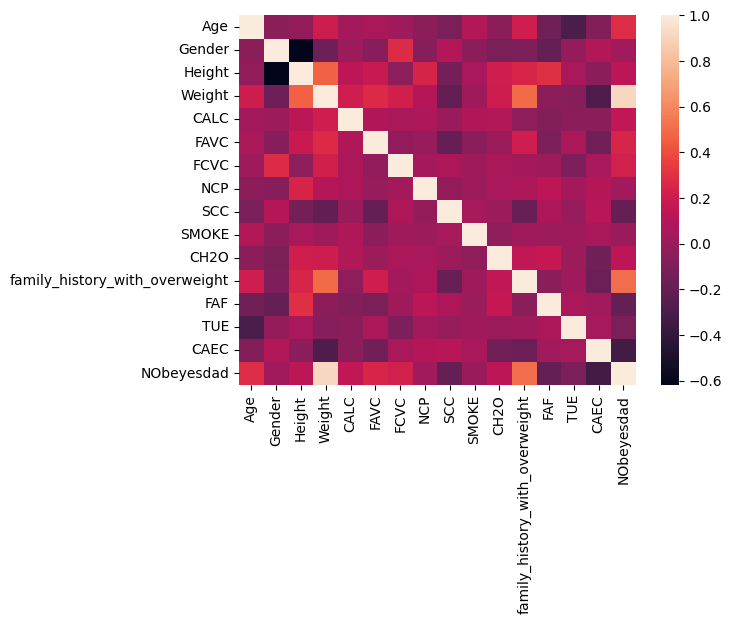

In [40]:
# Heatmap

sns.heatmap(df.corr())

# Gráfico de Dispersão: Altura x Peso

Utilizei esse gráfico para conseguir visualizar a dispersão dos dados de Altura e Peso das pessoas, conseguindo visualizar pontos extremos que são importantes para análises de graus de obesidade.

Text(0, 0.5, 'Weight')

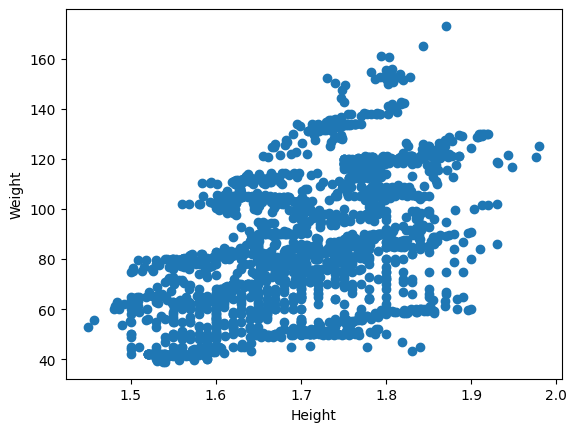

In [33]:
# Gráfico de Dispersão: Altura x Peso

plt.scatter(df['Height'],df['Weight']) 
plt.xlabel("Height") 
plt.ylabel('Weight') 

# Método Elbow - Quantidade de Clusters

Utilizei o método Elvow com um range de (1, 10) clusters para conseguir decidir qual é a quantidade ideal de Agrupamentos que devo utilizar para prosseguir na análise.

Com isso, percebe-se abaixo que o valor ideal é o "cotovelo", ou seja, o ponto em que o que vem após ele a distorção começa a ficar linear. Portanto, o número ideal de clusters é de 4.

[1447430.8465018221, 411403.89580032014, 198219.18157855043, 115580.00504613697, 85349.96387981219, 52460.02219083239, 42211.98768660757, 34734.52903166501, 25219.149897756404]


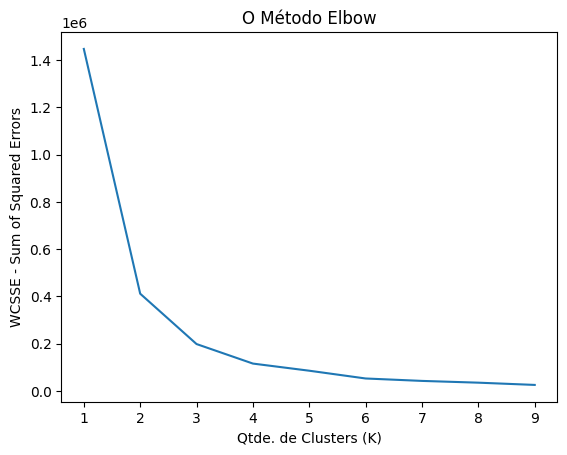

In [61]:
# WCSSE 

sse = [] 
k_rng = range(1,10) 

for k in k_rng: 
    km = KMeans(n_clusters=k) 
    km.fit(df[['Height','Weight']]) 
    sse.append(km.inertia_) 

print(sse) 

plt.title('O Método Elbow') 
plt.xlabel('Qtde. de Clusters (K)') 
plt.ylabel('WCSSE - Sum of Squared Errors') 
plt.plot(k_rng,sse) 

In [56]:
km = KMeans(n_clusters=4) #  

y_predicted = km.fit_predict(df[['Age', 'Height', 'Weight']]) 
y_predicted 

array([3, 3, 0, ..., 1, 1, 1])

In [54]:
# Centróides 

km.cluster_centers_

array([[ 25.83961756,   1.6975119 ,  80.54360652],
       [ 23.39413541,   1.78964264, 130.34614831],
       [ 20.90697537,   1.65057551,  55.22262182],
       [ 26.36720578,   1.72028551, 107.45572122]])

In [53]:
# Inclusão do Centróide como uma nova coluna do Dataframe e exibição de todas as linhas com seu cluster (última coluna)

df['cluster']=y_predicted 
df


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,cluster
0,21.000000,1,1.620000,64.000000,0,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,1,1,2
1,21.000000,1,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,2
2,23.000000,0,1.800000,77.000000,2,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,1,1,0
3,27.000000,0,1.800000,87.000000,2,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,2,0
4,22.000000,0,1.780000,89.800000,1,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,1,6,1
2107,21.982942,1,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,1,6,1
2108,22.524036,1,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,1,6,1
2109,24.361936,1,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,1,6,1


# Análise de cluster

Para visualizar melhor os agrupamentos, coloquei como um gráfico de dispersão da Altura pelo Peso, colocando cores únicas para cada um.
Uma nota geral entre os agrupamentos é de que eles ficaram mais agrupados por "range" de Pesos.

No primeiro agrupamento nota-se que ele agrupou os dados em um "range" de pesos ficou entre cerca de 70kg e 90kg, o segundo cluster ficou entre 120kg e o maior valor encontrado. O terceiro agrupamento ele utilizou os "menores" pesos do dataset, chegando até os pesos do primeiro agrupamento. No último agrupamento ele utilizou os dados a partir de cerca de 90kg até chegar bem próximos dos pesos do 2 cluster, com cerca de 120kg.


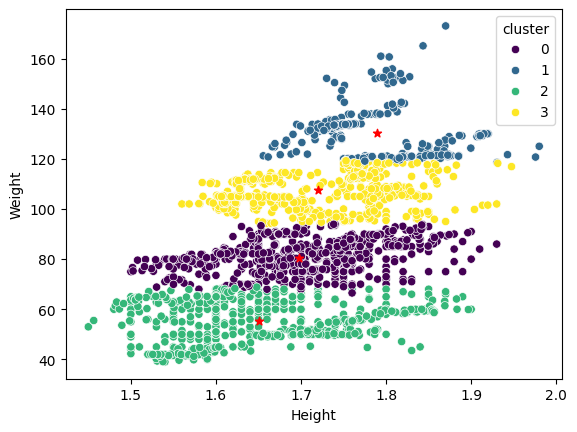

In [51]:
# Comparação de Clusters: Height vs. Weight

sns.scatterplot(x='Height', y='Weight', hue='cluster', data=df, palette='viridis')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,2],color='red',marker='*',label='centroid') 